In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path = 'datasets/dataset_practica'
df = pd.read_csv(path+'/insurance.csv', sep=',')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observaciones 
* La edad va de 18 a 64 years
* El BMI tiene de media 30.4, por lo que el 50% de la poblacion tiene sobrepeso
* La cantidad de hijos va de 0 a 5 hijos
* Los cargos van desde poco mas de 1100$, con una mediana de 9300$

In [8]:
def imc_categoria(x):
    if x < 18.5:
        tipo_peso = 'Peso insuficiente'
    elif x >=18.5 and x<=24.9:
        tipo_peso = 'Peso normal'
    elif x>=25 and x<=29.9:
        tipo_peso = 'Sobrepeso'
    else:
        tipo_peso = 'Obesidad'  
    return tipo_peso

In [9]:
df['kind_weight'] = df['bmi'].apply(imc_categoria)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   kind_weight  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [10]:
def edad_categoria(x):
    if x<= 35:
        tipo_p = 'Adulto joven'
    elif x> 35 and x<= 55:
        tipo_p = 'Adulto'
    else:
        tipo_p = 'Anciano'
    return tipo_p

In [11]:
df['kind_person'] = df['age'].apply(edad_categoria)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   kind_weight  1338 non-null   object 
 8   kind_person  1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [12]:
cat_columns = df.select_dtypes(include="object").columns.to_list()
num_columns = df.select_dtypes(include=["int64","float64"]).columns.to_list()


In [13]:
cat_columns

['sex', 'smoker', 'region', 'kind_weight', 'kind_person']

In [14]:
num_columns

['age', 'bmi', 'children', 'charges']

ValueError: num must be an integer with 1 <= num <= 4, not 5

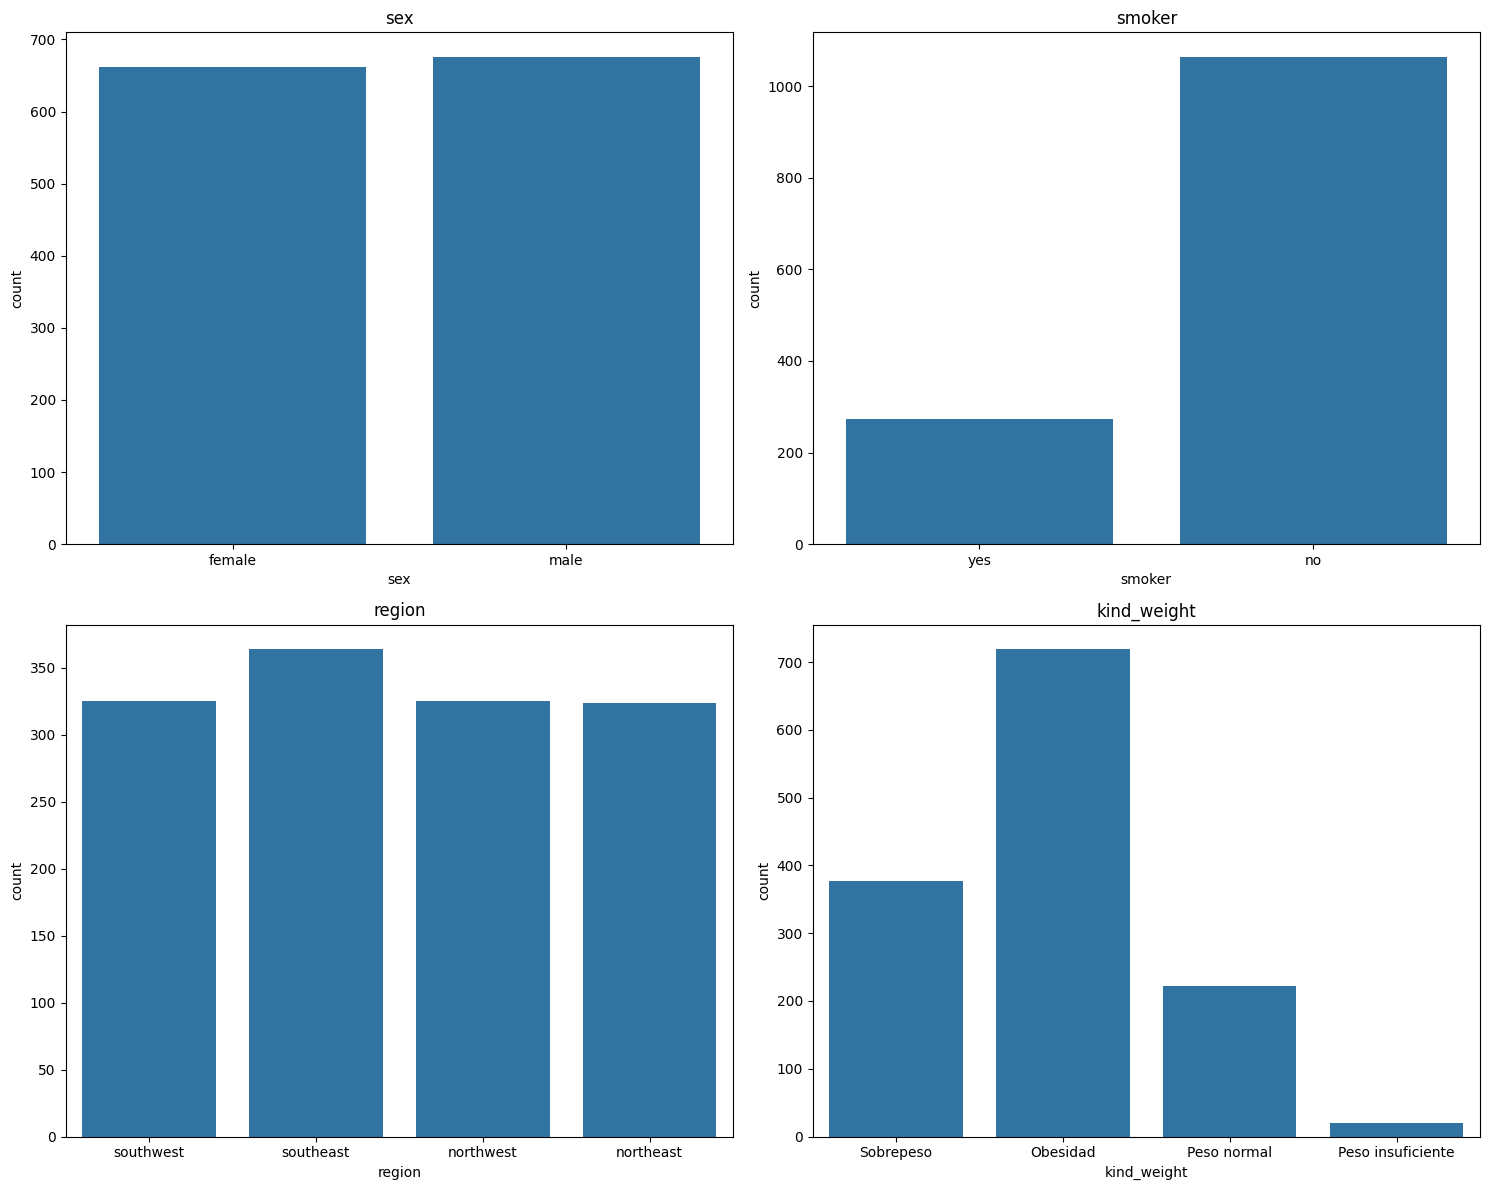

In [33]:
plt.figure(1, figsize=(15,12))
n_col = 2
n_row = int(len(cat_columns)/2)
 
for i, col in enumerate(cat_columns):
    plt.subplot(n_row,n_col, i+1)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Recuento de variables categoricas')
plt.tight_layout()
plt.show()

In [25]:
n_row

2

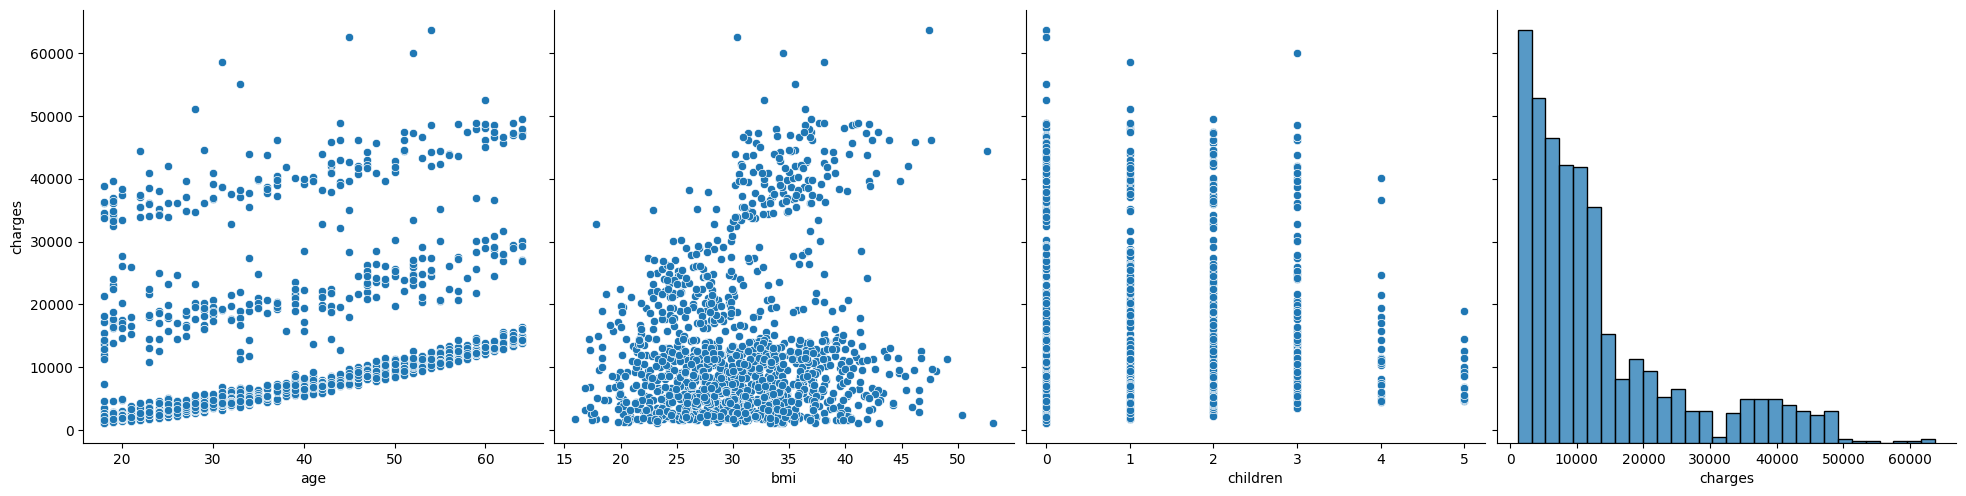

In [26]:
sns.pairplot(df, y_vars=['charges'], height=5)
plt.show()

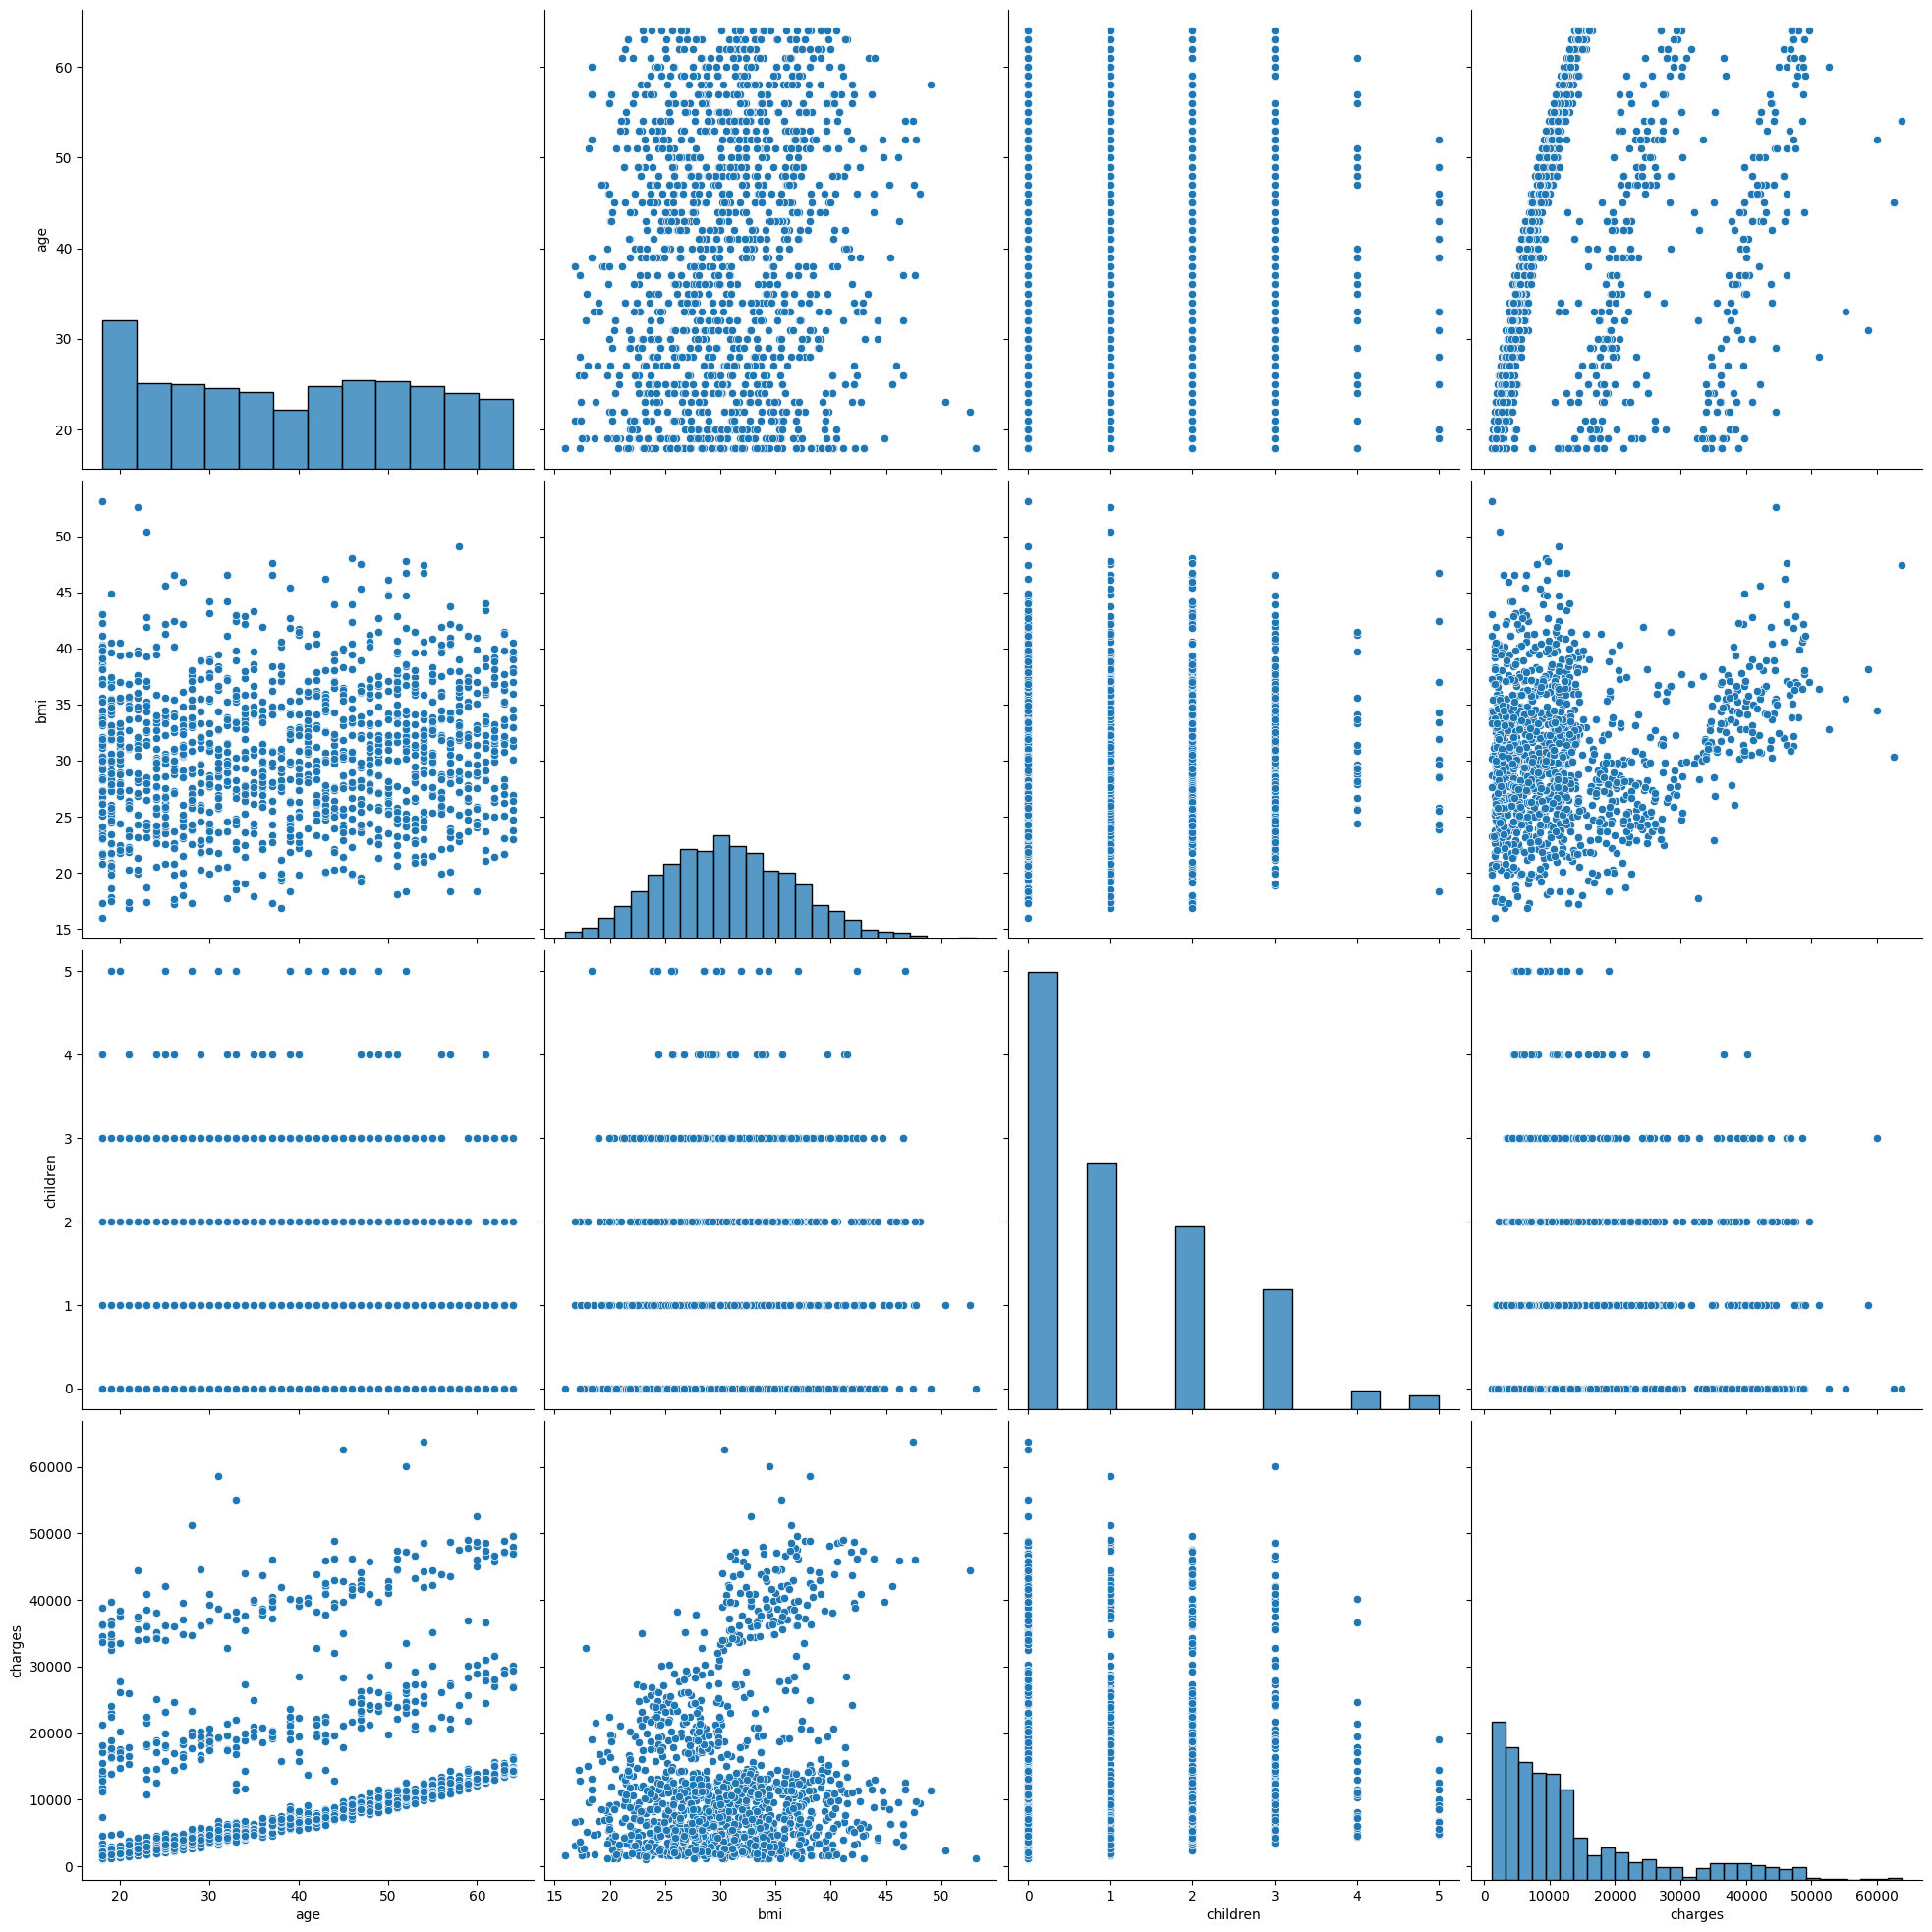

In [27]:
sns.pairplot(df, height=5)

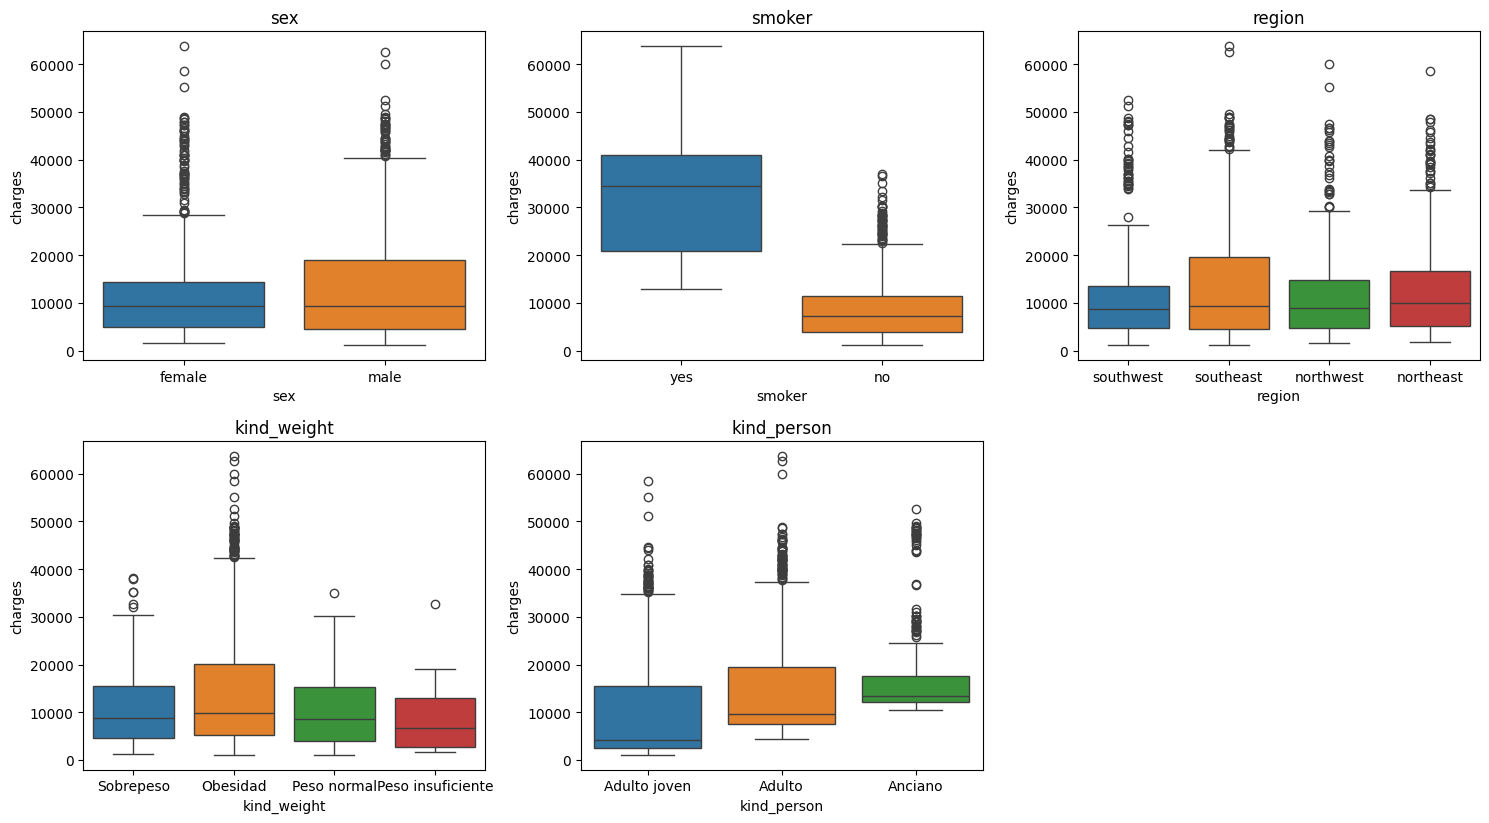

In [32]:
plt.figure(1, figsize=(15,12))
n_col = 3
n_row = int(np.ceil(len(cat_columns)/2))
for i, col in enumerate(cat_columns):
    plt.subplot(n_row, n_col, i+1)
    sns.boxplot(data= df, x=col, hue=col, y='charges')
    plt.title(col)
    plt.tight_layout()

plt.show()

Columna: sex


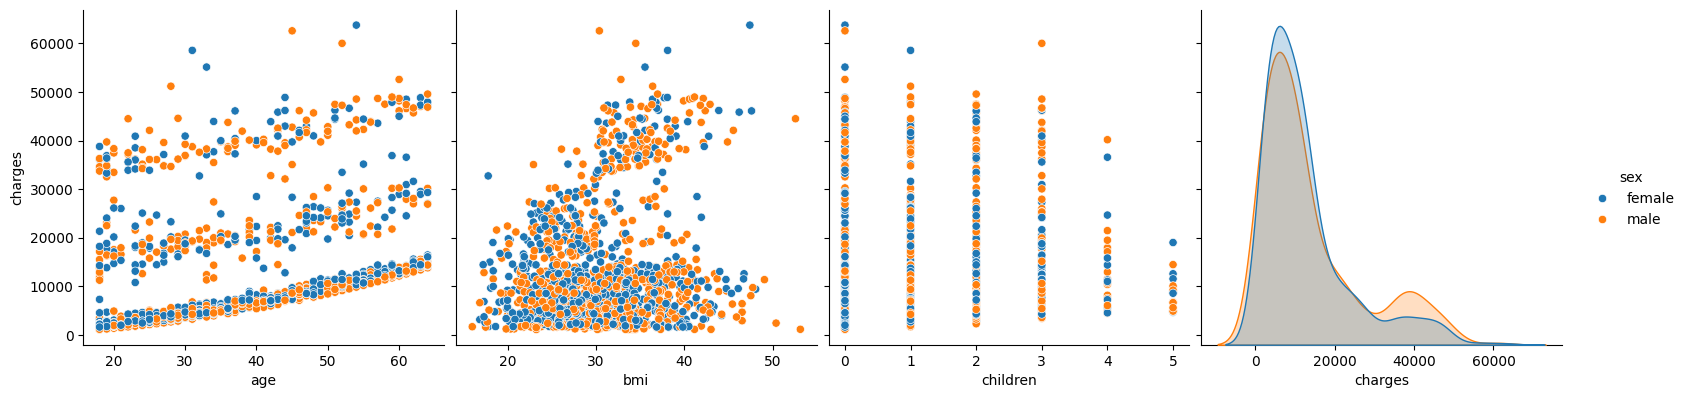

Columna: smoker


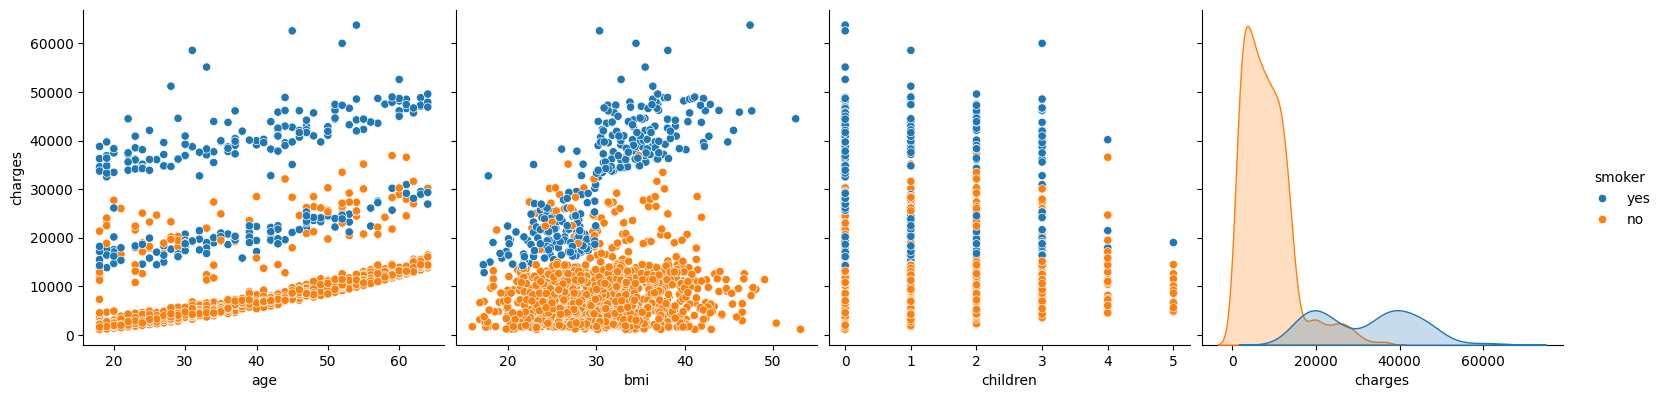

Columna: region


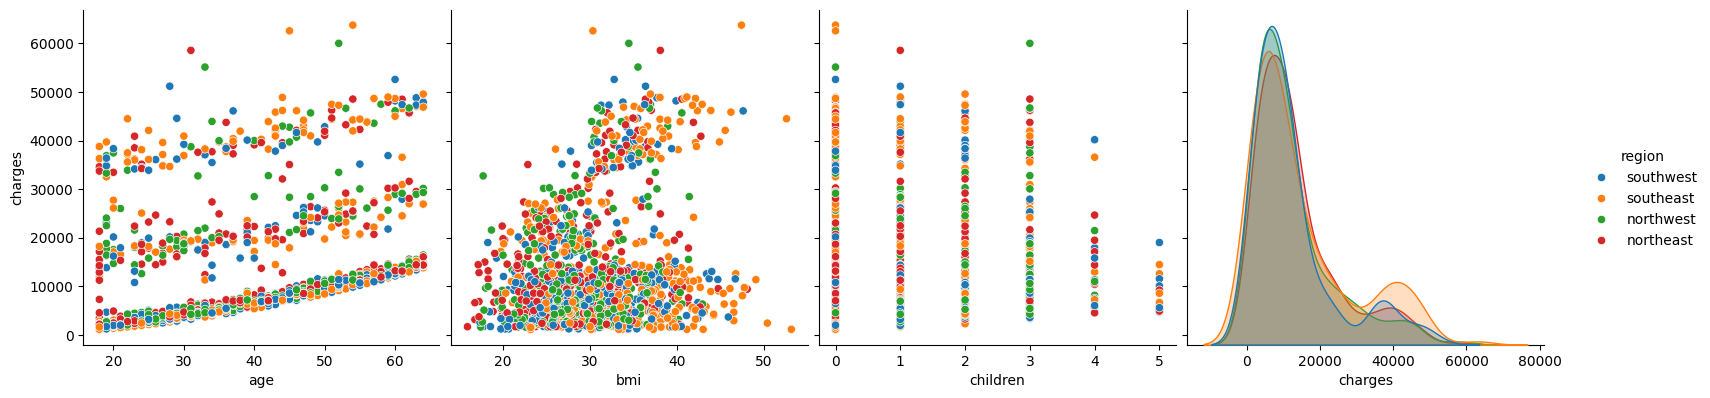

Columna: kind_weight


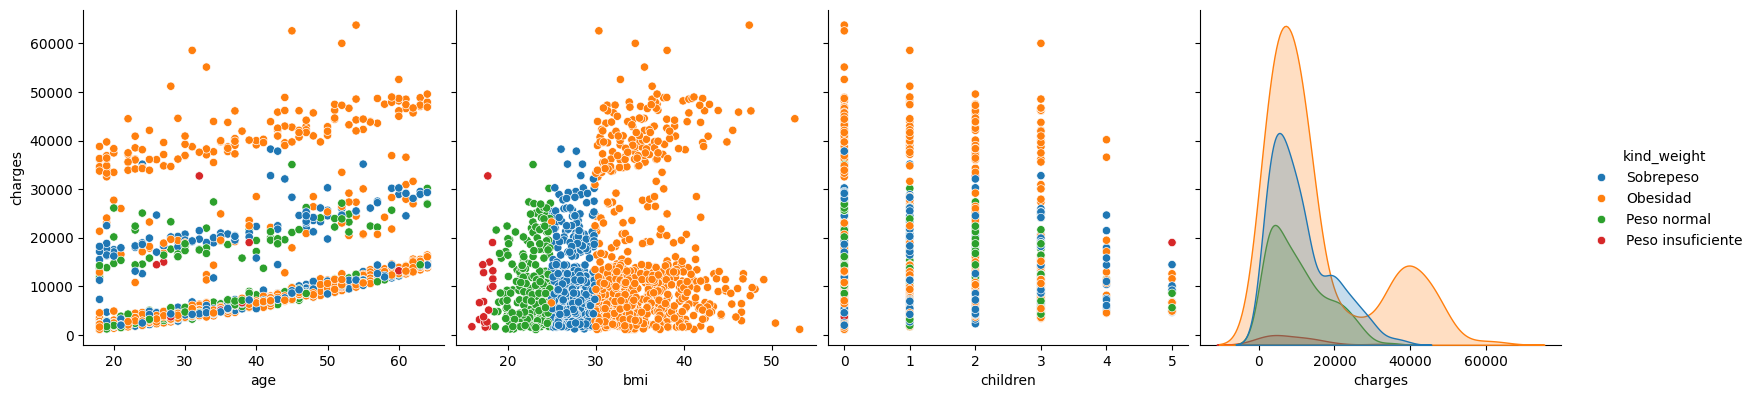

Columna: kind_person


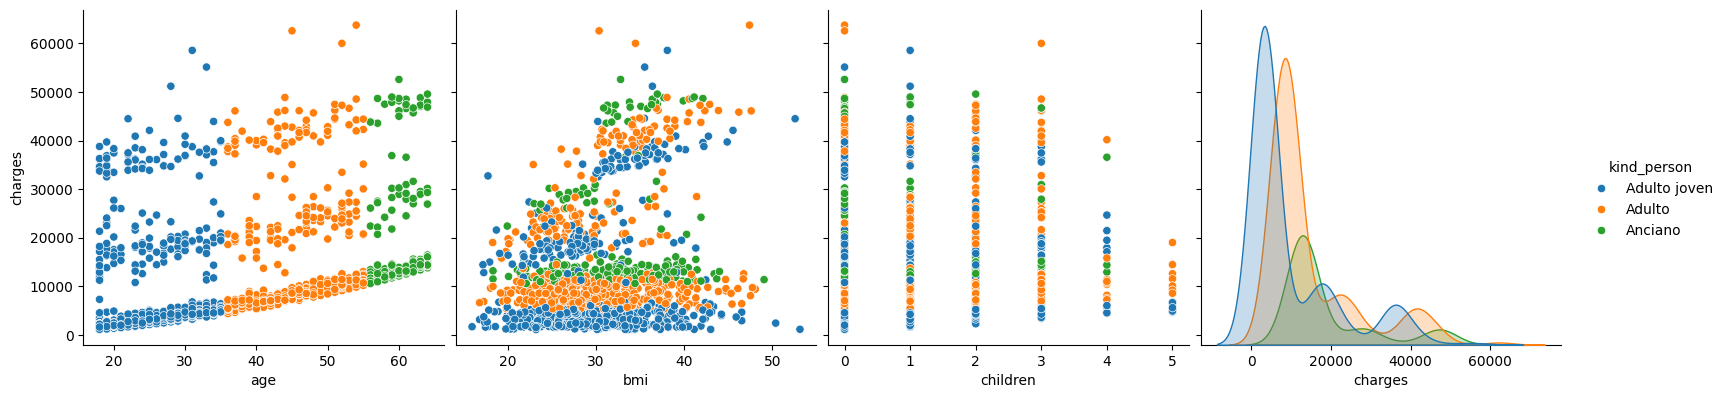

In [34]:
for col in cat_columns: 
    print('Columna:', col)
    sns.pairplot(df, y_vars=['charges'], hue=col, height=4)
    plt.show()

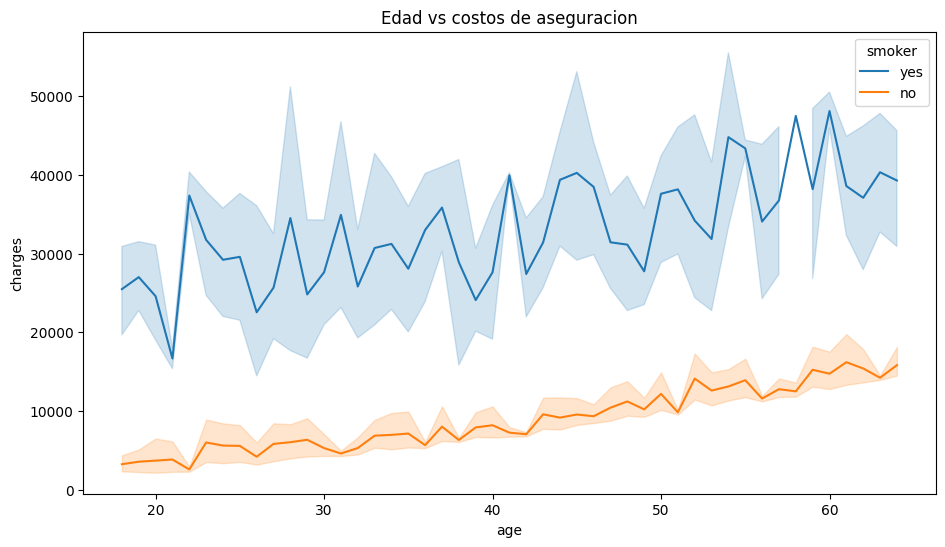

In [38]:
plt.figure(figsize=(11,6))

sns.lineplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Edad vs costos de aseguracion')
plt.show()

In [39]:
df_dum = df.copy()

In [40]:
df_dum = pd.get_dummies(df, dtype='float')

In [41]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1338 non-null   int64  
 1   bmi                            1338 non-null   float64
 2   children                       1338 non-null   int64  
 3   charges                        1338 non-null   float64
 4   sex_female                     1338 non-null   float64
 5   sex_male                       1338 non-null   float64
 6   smoker_no                      1338 non-null   float64
 7   smoker_yes                     1338 non-null   float64
 8   region_northeast               1338 non-null   float64
 9   region_northwest               1338 non-null   float64
 10  region_southeast               1338 non-null   float64
 11  region_southwest               1338 non-null   float64
 12  kind_weight_Obesidad           1338 non-null   f

In [42]:
df_label = df.copy()

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_label['sex'] = encoder.fit_transform(df_label['sex'])



In [44]:
df_label.head()

,age,sex,bmi,children,smoker,region,charges,kind_weight,kind_person
0,19,0,27.900,0,yes,southwest,16884.92400,Sobrepeso,Adulto joven
1,18,1,33.770,1,no,southeast,1725.55230,Obesidad,Adulto joven
2,28,1,33.000,3,no,southeast,4449.46200,Obesidad,Adulto joven
3,33,1,22.705,0,no,northwest,21984.47061,Peso normal,Adulto joven
4,32,1,28.880,0,no,northwest,3866.85520,Sobrepeso,Adulto joven


In [45]:
df_label['smoker'] = encoder.fit_transform(df_label['smoker'])

In [46]:
df_label.head()

,age,sex,bmi,children,smoker,region,charges,kind_weight,kind_person
0,19,0,27.900,0,1,southwest,16884.92400,Sobrepeso,Adulto joven
1,18,1,33.770,1,0,southeast,1725.55230,Obesidad,Adulto joven
2,28,1,33.000,3,0,southeast,4449.46200,Obesidad,Adulto joven
3,33,1,22.705,0,0,northwest,21984.47061,Peso normal,Adulto joven
4,32,1,28.880,0,0,northwest,3866.85520,Sobrepeso,Adulto joven


In [47]:
df_label['region'] = encoder.fit_transform(df_label['region'])

In [48]:
df_label['kind_weight'] = encoder.fit_transform(df_label['kind_weight'])
df_label['kind_person'] = encoder.fit_transform(df_label['kind_person'])

In [49]:
df_label.head()

,age,sex,bmi,children,smoker,region,charges,kind_weight,kind_person
0,19,0,27.900,0,1,3,16884.92400,3,1
1,18,1,33.770,1,0,2,1725.55230,0,1
2,28,1,33.000,3,0,2,4449.46200,0,1
3,33,1,22.705,0,0,1,21984.47061,2,1
4,32,1,28.880,0,0,1,3866.85520,3,1


In [50]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   int32  
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   int32  
 5   region       1338 non-null   int32  
 6   charges      1338 non-null   float64
 7   kind_weight  1338 non-null   int32  
 8   kind_person  1338 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 68.1 KB


In [52]:
df_label.to_csv('datasets/dataset_practica/dataset_encoded.csv',sep=',')